In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
my_train_mitbih = pd.read_csv('mitbih_train.csv', header = None)
my_test_mitbih = pd.read_csv('mitbih_test.csv', header=None)
my_ptb_normal = pd.read_csv('ptbdb_abnormal.csv', header = None)
my_ptb_abnormal = pd.read_csv('ptbdb_normal.csv', header=None)

In [3]:
my_train_mitbih.shape

(87554, 188)

In [4]:
my_test_mitbih.shape

(21892, 188)

In [5]:
my_train_mitbih.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Merge normal and abnormal in PTD dataset and use sklearn to shuffle rows
comp_ptd=pd.concat([my_ptb_normal,my_ptb_abnormal],axis=0)
from sklearn.utils import shuffle
shuffled_ptb_df = shuffle(comp_ptd)

In [8]:
shuffled_ptb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
2191,0.936393,0.995974,0.398953,0.080515,0.000000,0.025362,0.054348,0.074879,0.082126,0.088164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3010,0.958624,0.267422,0.044861,0.000000,0.010453,0.097561,0.120645,0.119774,0.121951,0.126742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3076,1.000000,0.876694,0.422764,0.102981,0.000000,0.216802,0.295393,0.294038,0.325203,0.339431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,0.833333,1.000000,0.998273,0.527634,0.253022,0.392919,0.304836,0.291019,0.307427,0.284974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9855,0.969938,0.681698,0.145004,0.000000,0.195402,0.130858,0.085765,0.137931,0.078691,0.084881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
print(my_train_mitbih.isnull().sum().sum())
print(my_test_mitbih.isnull().sum().sum())
print(shuffled_ptb_df.isnull().sum().sum())


0
0
0


In [8]:
print(my_train_mitbih.shape)
print(my_test_mitbih.shape)
print(shuffled_ptb_df.shape)


(87554, 188)
(21892, 188)
(14552, 188)


In [9]:
my_train_mitbih[187] = my_train_mitbih[187].astype(int)
label_count_train = my_train_mitbih[187].value_counts()
print(label_count_train)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [10]:
my_test_mitbih[187] = my_test_mitbih[187].astype(int)
label_count_test = my_test_mitbih[187].value_counts()
print(label_count_test)

0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64


In [11]:
shuffled_ptb_df[187] = shuffled_ptb_df[187].astype(int)
label_count_ptb = shuffled_ptb_df[187].value_counts()
print(label_count_ptb)

1    10506
0     4046
Name: 187, dtype: int64


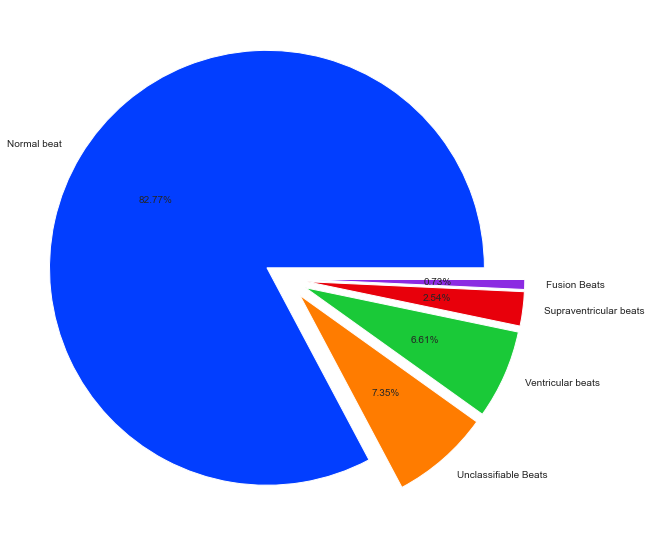

In [12]:
plt.figure(figsize=(20, 10))
my_circle = plt.Circle((0, 0),0, color='white')
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.pie(label_count_train,
        labels=['Normal beat', 'Unclassifiable Beats', 'Ventricular beats', 'Supraventricular beats',
                'Fusion Beats'],
        colors=palette_color, explode=explode, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

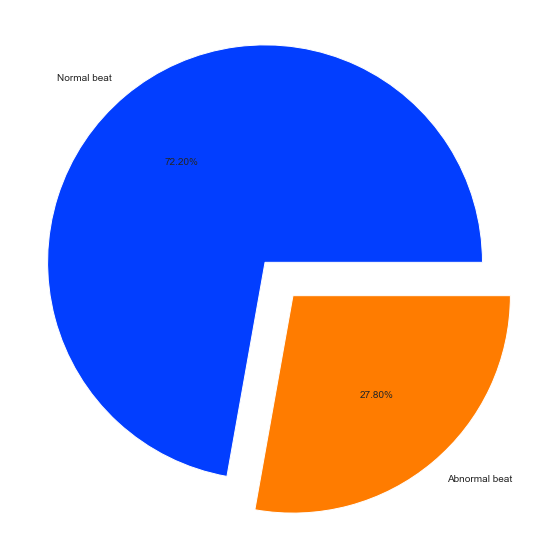

In [12]:
plt.figure(figsize=(20, 10))
my_circle = plt.Circle((0, 0), 0, color='white')
explode = [0.1, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.pie(label_count_ptb, labels=['Normal beat', 'Abnormal beat'],
        colors=palette_color, explode=explode, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

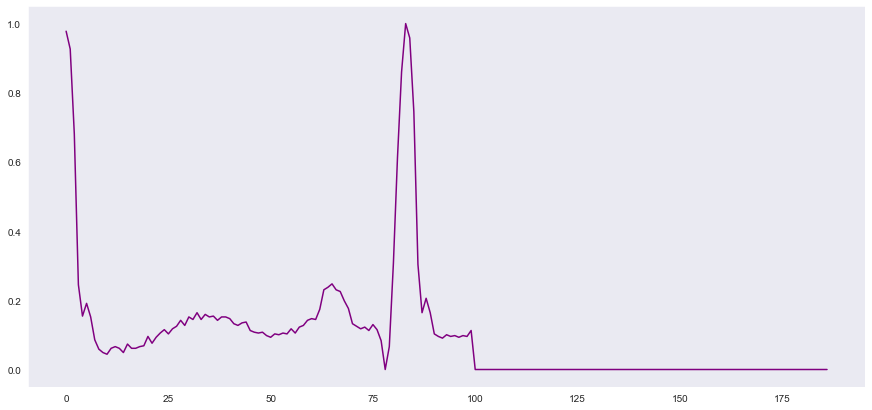

In [10]:
# show one data
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.plot(my_train_mitbih.iloc[0, :187], color='purple')
plt.show()


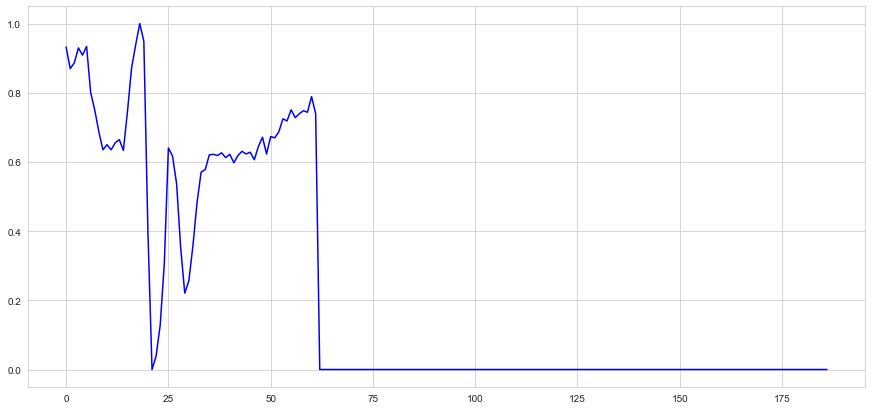

In [14]:
# show normal heartbeat
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.plot(my_ptb_normal.iloc[0, :187], color='blue')
plt.show()


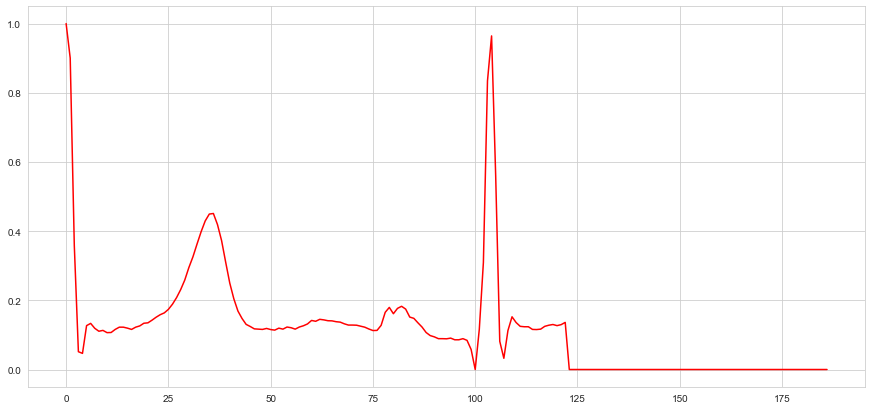

In [15]:
# show normal heartbeat
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.plot(my_ptb_abnormal.iloc[0, :187], color='red')
plt.show()

In [11]:
# Splitting 5 Classes
classes_split = my_train_mitbih.values
# - 1 = Last Column
features = classes_split[:, :-1]
# Convert last column from float type to integer
label = classes_split[:, -1].astype(int)
class_n = np.argwher(label == 0).flatten()
class_sv = np.argwhere(label == 1).flatten()
class_ven = np.argwhere(label == 2).flatten()
class_fu = np.argwhere(label == 3).flatten()
class_un = np.argwhere(label == 4).flatten()

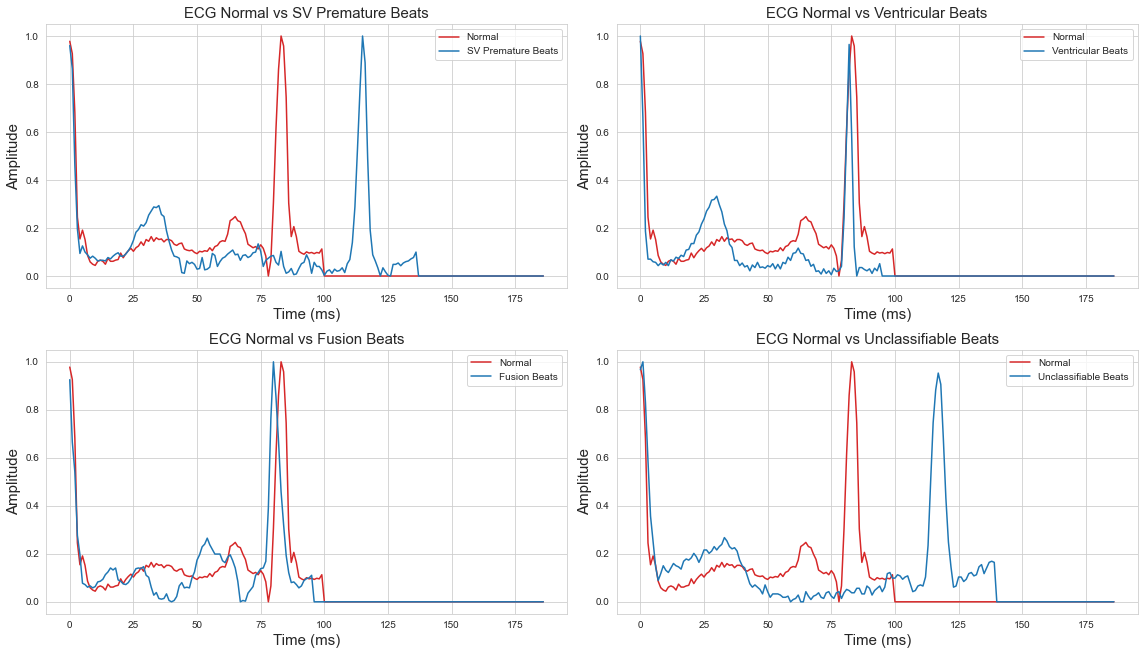

In [17]:
# Define class names
class_names = ['Normal Beats', 'SV Premature Beats', 'Ventricular Beats', 'Fusion Beats', 'Unclassifiable Beats']
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()
# Plot each class against Normal in a separate subplot
for i in range(1, 5):
    axs[i - 1].plot(features[0], 'tab:red', label="Normal")
    axs[i - 1].plot(features[i], label=class_names[i])
    axs[i - 1].set_title(f"ECG Normal vs {class_names[i]}", fontsize=15)
    axs[i - 1].set_ylabel("Amplitude", fontsize=15)
    axs[i - 1].set_xlabel("Time (ms)", fontsize=15)
    axs[i - 1].legend()

# Add a title and adjust the layout
#fig.suptitle('ECG Classes', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Run this code to implement no resampling and skip all code cells for SMOTE technique
my_trainSet=my_train_mitbih
my_testSet=my_test_mitbih

In [14]:
# Start running the code from here to implement SMOTE technique
smote_x=my_train_mitbih.loc[:,0:186]
smote_y=my_train_mitbih.loc[:,187]
smote_x1=my_test_mitbih.loc[:,0:186]
smote_y1=my_test_mitbih.loc[:,187]

In [15]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train, y_train=smt.fit_resample(smote_x, smote_y)
x1_train, y1_train=smt.fit_resample(smote_x1, smote_y1)
print('Original train dataset shape: ', Counter(smote_y))
print('New train dataset shape: ', Counter(y_train))
print('Original test dataset shape: ', Counter(smote_y1))
print('New test dataset shape: ', Counter(y1_train))

Original train dataset shape:  Counter({0.0: 72471, 4.0: 6431, 2.0: 5788, 1.0: 2223, 3.0: 641})
New train dataset shape:  Counter({0.0: 72471, 1.0: 72471, 2.0: 72471, 3.0: 72471, 4.0: 72471})
Original test dataset shape:  Counter({0.0: 18118, 4.0: 1608, 2.0: 1448, 1.0: 556, 3.0: 162})
New test dataset shape:  Counter({0.0: 18118, 1.0: 18118, 2.0: 18118, 3.0: 18118, 4.0: 18118})


In [16]:
y_train_df = pd.DataFrame(y_train)
y1_train_df = pd.DataFrame(y1_train)
train_sm_df = pd.concat([x_train, y_train_df], axis=1)
test_sm_df = pd.concat([x1_train, y1_train_df], axis=1)

In [17]:
train_sm_df[187] = train_sm_df[187].astype(int)
sm_df = train_sm_df[187].value_counts()
print(sm_df)

0    72471
1    72471
2    72471
3    72471
4    72471
Name: 187, dtype: int64


In [18]:
test_sm_df[187] = test_sm_df[187].astype(int)
smt_df = test_sm_df[187].value_counts()
print(smt_df)

0    18118
1    18118
2    18118
3    18118
4    18118
Name: 187, dtype: int64


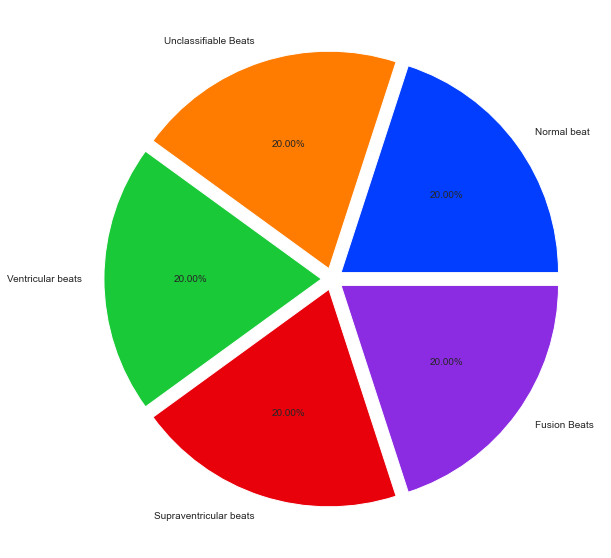

In [19]:
plt.figure(figsize=(20, 10))
my_circle = plt.Circle((0, 0),0, color='white')
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.pie(smt_df,
        labels=['Normal beat', 'Unclassifiable Beats', 'Ventricular beats', 'Supraventricular beats',
                'Fusion Beats'],
        colors=palette_color, explode=explode, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Plugging the SMOTE resampled data back into the training and testing set
my_trainSet=train_sm_df
my_testSet=test_sm_df

In [19]:
from keras.utils.np_utils import to_categorical
# converting int values of classes to categorical values
target_train = my_trainSet[187]
target_test = my_testSet[187]
# to_categorical - convert classes into encoding - categorical values
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

In [20]:
target_train.shape

(362355,)

In [21]:
target_test.shape

(90590,)

In [22]:
X_train=my_trainSet.iloc[:,:187].values
X_test=my_testSet.iloc[:,:187].values

In [23]:
X_train.shape

(362355, 187)

In [24]:
X_train.shape[1]

187

In [20]:
import hickle as hkl
data = {'X_train.h5': X_train, 'X_test': X_test,'y_train': y_train,'y_test':y_test}
hkl.dump(data,'data.hkl')

In [25]:
## Split Features from train_df  & reshape

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [54]:
X_train.shape

(362355, 187, 1)

In [26]:
import tensorflow as tf
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, precision_score, recall_score
from keras import Sequential
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, BatchNormalization, Dropout, UpSampling1D
from keras.layers import GlobalAveragePooling1D
from tensorflow import keras
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Define CNN 1D model
model = keras.Sequential([
    layers.Input(shape=(187,1)),
    layers.Conv1D(filters=64, kernel_size=9, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    layers.Conv1D(filters=64, kernel_size=6, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32, kernel_size=3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(y_train.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 64)           640       
                                                                 
 batch_normalization (BatchN  (None, 187, 64)          256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 187, 64)           0         
                                                                 
 dropout (Dropout)           (None, 187, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 187, 64)           24640     
                                                                 
 batch_normalization_1 (Batc  (None, 187, 64)          256       
 hNormalization)                                        

In [29]:
# Define callbacks
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint(filepath='smote_cnn.h5', monitor='val_loss', save_best_only=True)]
# Train CNN 1D model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr, early])

Epoch 1/50
5662/5662 [==============================] - 389s 68ms/step - loss: 0.4554 - accuracy: 0.8345 - val_loss: 0.2928 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 2/50
5662/5662 [==============================] - 446s 79ms/step - loss: 0.2729 - accuracy: 0.9081 - val_loss: 0.3027 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/50
5662/5662 [==============================] - 399s 70ms/step - loss: 0.2285 - accuracy: 0.9238 - val_loss: 0.2287 - val_accuracy: 0.9229 - lr: 0.0010
Epoch 4/50
5662/5662 [==============================] - 398s 70ms/step - loss: 0.2054 - accuracy: 0.9321 - val_loss: 0.2201 - val_accuracy: 0.9291 - lr: 0.0010
Epoch 5/50
5662/5662 [==============================] - 400s 71ms/step - loss: 0.1884 - accuracy: 0.9381 - val_loss: 0.1671 - val_accuracy: 0.9448 - lr: 0.0010
Epoch 6/50
5662/5662 [==============================] - 397s 70ms/step - loss: 0.1773 - accuracy: 0.9416 - val_loss: 0.1912 - val_accuracy: 0.9383 - lr: 0.0010
Epoch 7/50
5662/5662 [==================

In [31]:
model.load_weights('smote_cnn.h5')

In [32]:
scores = model.evaluate((X_test),y_test, verbose=0)
scores[1]

0.9614306092262268

In [33]:
# Evaluate CNN 1D model
y_pred = model.predict(X_test)
y_val_label = np.argmax(y_test, axis=1)
y_pred_label = np.argmax(y_pred, axis=1)

2831/2831 [==============================] - 15s 5ms/step


In [34]:
# Calculate evaluation metrics
loss, accuracy = model.evaluate(X_test, y_test)
f1 = f1_score(y_val_label, y_pred_label, average='weighted')
precision = precision_score(y_val_label, y_pred_label, average='weighted')
recall = recall_score(y_val_label, y_pred_label, average='weighted')
auc = roc_auc_score(y_test, y_pred, average='macro')
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('AUC:', auc)

2831/2831 [==============================] - 15s 5ms/step - loss: 0.1328 - accuracy: 0.9614
Validation loss: 0.13284841179847717
Validation accuracy: 0.9614306092262268
F1 score: 0.9614121895279137
Precision: 0.9618243898235712
Recall: 0.9614306214813997
AUC: 0.9970983642775456


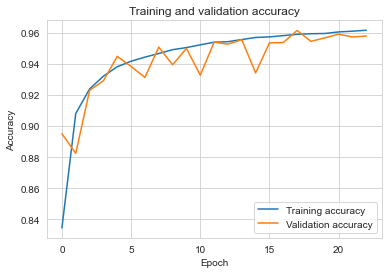

In [35]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

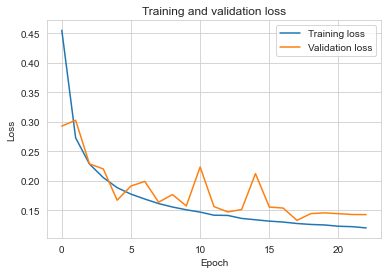

In [36]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

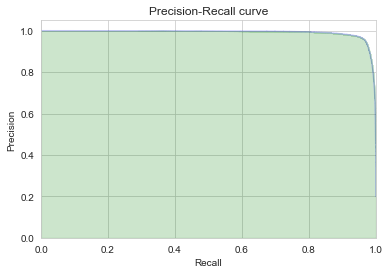

In [39]:
from sklearn.metrics import precision_recall_curve
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

In [40]:
# Print classification report
print(classification_report(y_val_label, y_pred_label))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     18118
           1       0.97      0.92      0.95     18118
           2       0.97      0.96      0.96     18118
           3       0.97      0.96      0.97     18118
           4       0.98      1.00      0.99     18118

    accuracy                           0.96     90590
   macro avg       0.96      0.96      0.96     90590
weighted avg       0.96      0.96      0.96     90590



<AxesSubplot:>

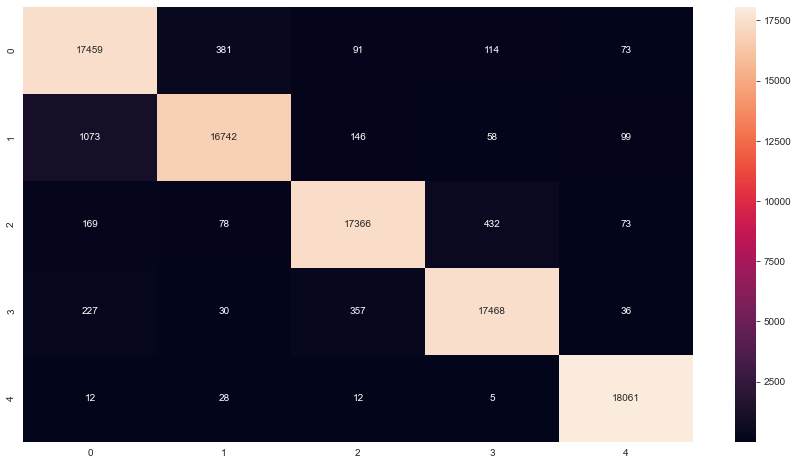

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='0.0f')

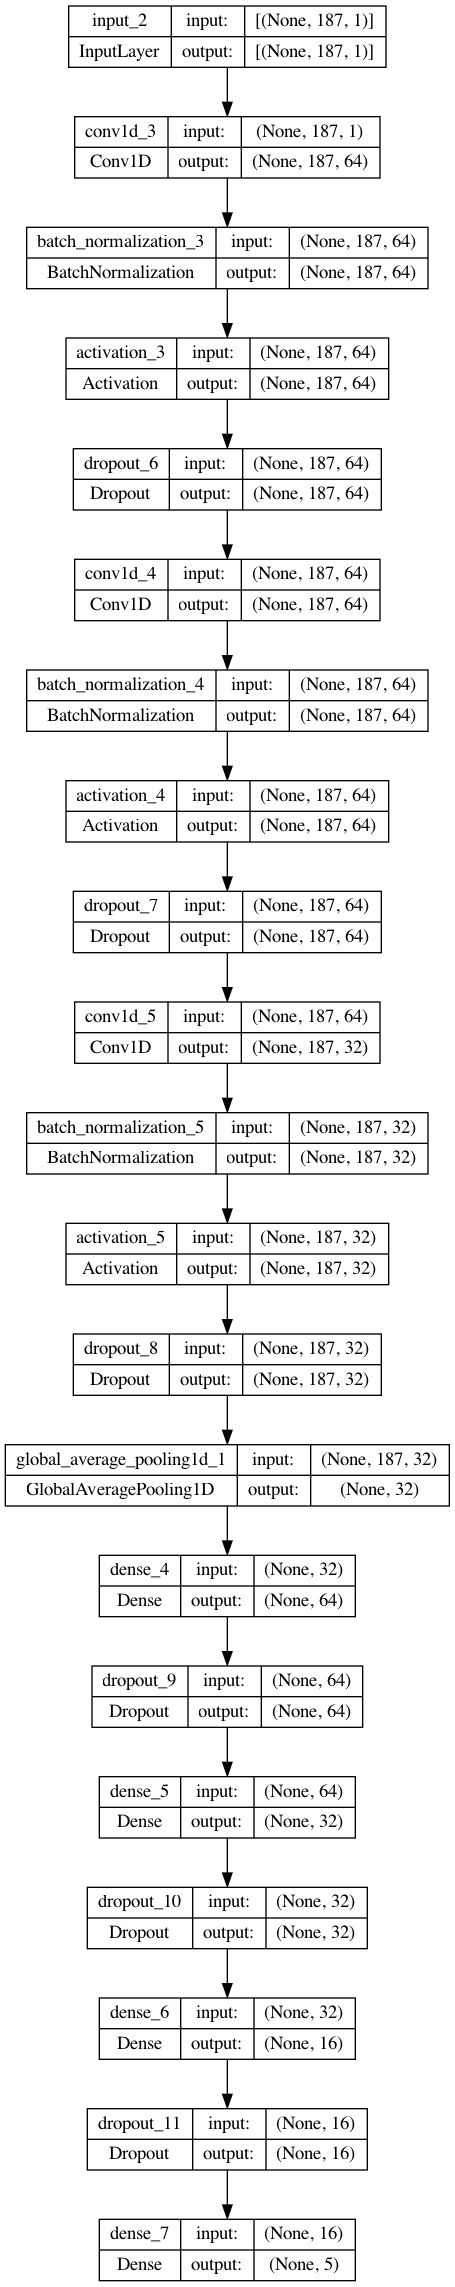

In [73]:
from keras.utils import plot_model
plot_model(model,'SMOTECNNECG.png',show_shapes=True)

In [82]:
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [89]:
# Define CNN 1D model
def create_model (optimizer='adam', filters=32,kernel_size=9, dense_units=32, dropout=0.2, batch_size=32, epochs=20):
    model = keras.Sequential([
        layers.Input(shape=(187,1)),
        layers.Conv1D(filters=filters, kernel_size=kernel_size, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(dropout),
        layers.Conv1D(filters=filters, kernel_size=(kernel_size-3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(dropout),
        layers.Conv1D(filters=int(filters//2), kernel_size=int(kernel_size//3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(dropout),
        layers.GlobalAveragePooling1D(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(int(dense_units//2), activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(int(dense_units//4), activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [90]:
optimizer=['adam', 'Adadelta', 'Nadam']
filters= [32, 64, 28]
kernel_size=[9,12,15]
dense_units=[32, 64, 128]
epochs=[20, 30, 50]
batch_size=[32, 64, 128]
dropout=[0.2, 0.3, 0.5]

In [91]:
# Create KerasClassifier object for use in RandomizedSearchCV
model = KerasClassifier(model=create_model, verbose=0)

In [ ]:
# Define callbacks
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint(filepath='smote_cnn.h5', monitor='val_loss', save_best_only=True)]
# Perform random search
param_dist=dict(model__optimizer=optimizer, model__filters=filters,model__kernel_size=kernel_size,model__dense_units=dense_units, model__epochs=epochs,model__batch_size=batch_size,model__dropout=dropout)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=3, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train,epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr, early])

In [ ]:
# Print best hyperparameters and corresponding score
print(random_search.best_params_)
print(random_search.best_score_)

NOTE: after the best hyperparameter values are obtained. I retrained the CNN model with them

The next I did is setting up the tunned-SMOTE-CNN as a pretrained model and transferring it weights for
the classification task of PTB dataset. Below are the codes for the implementation

In [21]:
x=shuffled_ptb_df.loc[:,0:186]
y=shuffled_ptb_df.loc[:,187]
new_x,new_y  = smt.fit_resample(x, y.ravel())
print('Original train dataset shape: ', Counter(y))
print('New train dataset shape: ', Counter(new_y))

Original train dataset shape:  Counter({1.0: 10506, 0.0: 4046})
New train dataset shape:  Counter({1.0: 10506, 0.0: 10506})


In [22]:
y_ptb_df = pd.DataFrame(new_y)
y_ptb_df.rename(columns={0: 187}, inplace=True)
df_ptb_resampled = pd.concat([new_x, y_ptb_df], axis=1)
df_ptb_resampled[187] = df_ptb_resampled[187].astype(int)
ptb_count = df_ptb_resampled[187].value_counts()
print(ptb_count)

1    10506
0    10506
Name: 187, dtype: int64


In [23]:
df_ptb_resampled.shape

(21012, 188)

In [ ]:
#First split the resampled PTB dataset to train and test of a ratio 80:20, then splitting again the train into train and validation set of a ratio 70:30
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ptb_resampled, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
X_val = X_val.reshape(len(X_val), X_val.shape[1],1)

In [ ]:
from keras.models import load_model
from keras import Model

In [ ]:
# Load the pre-trained model on the MIT-BIH Arrhythmia ECG data
pretrained_model = load_model('smote_cnn.h5')

# Freeze the weights of the pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add a new output layer for the PTB Diagnostic data
new_output_layer = Dense(units=2, activation='sigmoid')(pretrained_model.layers[-2].output)

# Create the new model with the pre-trained layers and the new output layer
new_model = Model(inputs=pretrained_model.input, outputs=new_output_layer)

# Compile the new model
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow import keras

# Train the new model on the PTB Diagnostic data
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, min_lr=0.0001)
early = [EarlyStopping(monitor='val_loss', patience=8),
         ModelCheckpoint(filepath='best_pretrained_model.h5', monitor='val_loss', save_best_only=True)]
history = new_model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[reduce_lr, early],
                        validation_data=(X_val, y_val))

In [ ]:
new_model.load_weights('best_pretrained_model.h5')

In [ ]:
y_pred = new_model.predict(X_test)
y_val_label = np.argmax(y_test, axis=1)
y_predi_label = np.argmax(y_pred, axis=1)

In [ ]:
# Print classification report
print(classification_report(y_val_label, y_predi_label))

In [ ]:
# Calculate evaluation metrics
loss, accuracy = model.evaluate(X_test, y_test)
f1 = f1_score(y_val_label, y_predi_label, average='weighted')
precision = precision_score(y_val_label, y_predi_label, average='weighted')
recall = recall_score(y_val_label, y_predi_label, average='weighted')
auc = roc_auc_score(y_test, y_pred, average='macro')
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
('AUC:', auc)

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='0.0f')